In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df1 = pd.read_csv("./data/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<h1 style="color:grey;font-size:40px;">Drop unwanted columns</h1>  

In [3]:
df2 = df1.drop(["area_type", "availability", "society"], axis="columns")
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


<h1 style="color:grey;font-size:40px;">Check and Remove NANs</h1>

In [4]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [5]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [6]:
df3.shape

(12710, 6)

<h1 style="color:grey;font-size:40px;">Feature Engineering</h1>
<b>creating a new feature named bhk because the original size colums has different types of data (bedrooms and bhk)</b>

In [7]:
df3["bhk"] = df3.loc[:, "size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

<ipython-input-7-82f77ff3db86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3.loc[:, "size"].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


<b>Trying to see if the total_sqft data has only float values or not</b>

In [8]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [9]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


<b> As we can see there are many values in the total_sqft that are just ranges and also there are values of different units. We will get the average of the ranges and drop values that have different units</b>

In [10]:
def avg(x):
    lst = x.split("-")
    if len(lst) == 2:
        return float(lst[0])+float(lst[1])/2
    else:
        try:
            return float(x)
        except:
            return None

In [11]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(avg)
df4.isnull().sum()

location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

<b> Now we have the average of the total_sqft data that were ranges and we have dropped the sqft rows that had different units but doing that has created 42 nan rows which we need to remove too</b>

In [12]:
df5 = df4.dropna()
df5.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

<b> Here we will create another feature named price per square feet which will be essential to check data anomalies </b>

In [13]:
df6 = df5.copy()
df6["price_per_sqft"] = df6["price"]*100000/df6["total_sqft"]
df6

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [14]:
df6["price_per_sqft"].describe()

count    1.266800e+04
mean     6.858379e+03
std      2.263535e+04
min      2.678298e+02
25%      4.204933e+03
50%      5.350249e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

In [15]:
len(df6["location"].unique())

1259

<h1 style="color:grey;font-size:40px;">Dimension Reduction</h1>
<b> Currently in our data set we have lots of places but many of these places probably just has 1-2 samples, using such places as extra columns will give us too many features so we need to reduce it</b>

In [16]:
location_stats = df6["location"].value_counts(ascending=False)
location_stats

Whitefield              513
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          259
Thanisandra             230
                       ... 
Mallappa Layout           1
Amco Colony               1
Kanakapura Main Road      1
Kanakapura Road,          1
Sabari Nagar              1
Name: location, Length: 1259, dtype: int64

<b> We make an other column comprising of locations that has less than 10 samples</b>

In [17]:
location_stats.values.sum()

12668

In [18]:
len(df6["location"].unique())

1259

In [19]:
len(location_stats[location_stats<=10])

1024

In [20]:
loc_less_than_ten = location_stats[location_stats<=10]
df7 = df6.copy()
df7["location"] = df7["location"].apply(lambda x: "other" if x in loc_less_than_ten else x)
len(df7["location"].unique())

236

In [21]:
df7.head(300)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
310,Panathur,2 BHK,1438.0,2.0,3.0,100.00,2,6954.102921
311,other,3 BHK,1560.0,3.0,3.0,115.00,3,7371.794872
312,Yelahanka,2 BHK,1350.0,2.0,1.0,55.55,2,4114.814815
313,Kanakpura Road,3 BHK,1550.0,3.0,3.0,67.00,3,4322.580645


<h1 style="color:Grey; font-size:40px">Outlier removal</h1>
<b> here we will try to remove data that feels wrong, first thing we will check is the size of each room and see if they are normal or not. Usually one bedroom should be around 300 sqft</b>

In [22]:
df7[df7["total_sqft"]/df7["bhk"] < 300]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...
13219,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


<b> as we can see there are 655 samples that have room sizes lower than 300sqft, we can remove them </b>

In [23]:
df7.shape

(12668, 8)

In [24]:
df8 = df7[~(df7["total_sqft"]/df7["bhk"] < 300)]
df8

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


<h1 style="color:grey; font-size:40px">Z Score</h1>

In [25]:
df8["price_per_sqft"].mean()

6187.208242940624

In [26]:
df8["price_per_sqft"].std()

3993.1562242812447

In [27]:
df8["price_per_sqft"].describe()

count     12013.000000
mean       6187.208243
std        3993.156224
min         267.829813
25%        4166.666667
50%        5240.174672
75%        6815.365551
max      176470.588235
Name: price_per_sqft, dtype: float64

<b>As we can see here the lowest and highest values are way too low and high than the average value, so we need to remove such outliers. So, we will create upper and lower limit in zscore to remove such values</b>

In [28]:
upper_limit = df8["price_per_sqft"].mean()+(3*df8["price_per_sqft"].std())
upper_limit

18166.67691578436

In [29]:
lower_limit = df8["price_per_sqft"].mean()-(3*df8["price_per_sqft"].std())
lower_limit

-5792.26042990311

In [30]:
df9 = df8.copy()
df9["zscore"] = (df8["price_per_sqft"]-df8["price_per_sqft"].mean())/df8["price_per_sqft"].std()
df10 = df9[(df9["zscore"]>=-1) & (df9["zscore"]<=1)]
df10["price_per_sqft"].describe()

count    10888.000000
mean      5304.397513
std       1619.327716
min       2200.000000
25%       4077.650685
50%       5030.009702
75%       6296.893347
max      10169.491525
Name: price_per_sqft, dtype: float64

In [31]:
df10.shape

(10888, 9)

In [32]:
df10.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
bhk               0
price_per_sqft    0
zscore            0
dtype: int64

<b> Next we will see if we have weird data like price of 3bhk being lower than price of 2bhk for same amount of area. For this we will create a simple function that gives us scatter plots of bhk and price to compare</b>

In [33]:
def plot(location, df, bhk):
    bhk2 = df[(df["location"]==location) & (df["bhk"]==bhk[0])]
    bhk3 = df[(df["location"]==location) & (df["bhk"]==bhk[1])]
    matplotlib.rcParams['figure.figsize'] = (15,15)
    xAxis = bhk2["total_sqft"]
    yAxis = bhk2["price"]
    plt.scatter(xAxis, yAxis, color="blue", label="{} bhk".format(bhk[0]), s=50)
    xAxis = bhk3["total_sqft"]
    yAxis = bhk3["price"]
    plt.scatter(xAxis, yAxis, color="green", marker="+", label="{} bhk".format(bhk[1]), s=50)
    plt.xlabel("Total Square Fit Area")
    plt.ylabel("Price (in lakhs)")
    plt.title(location)
    plt.legend()

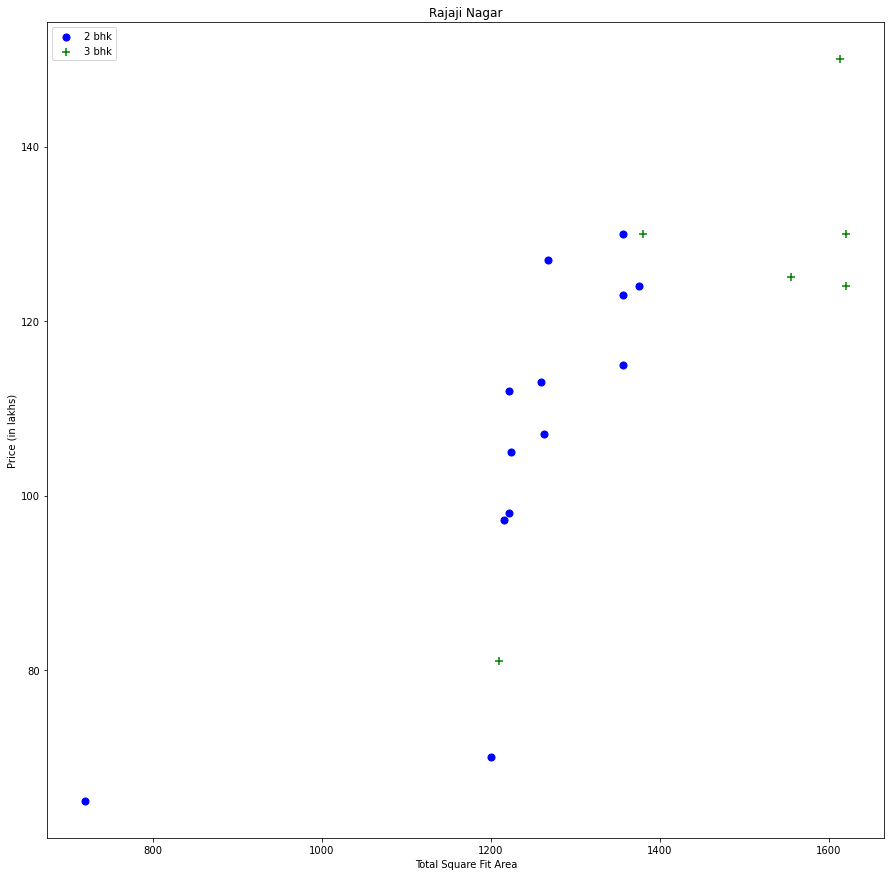

In [34]:
plot("Rajaji Nagar", df10, [2,3])

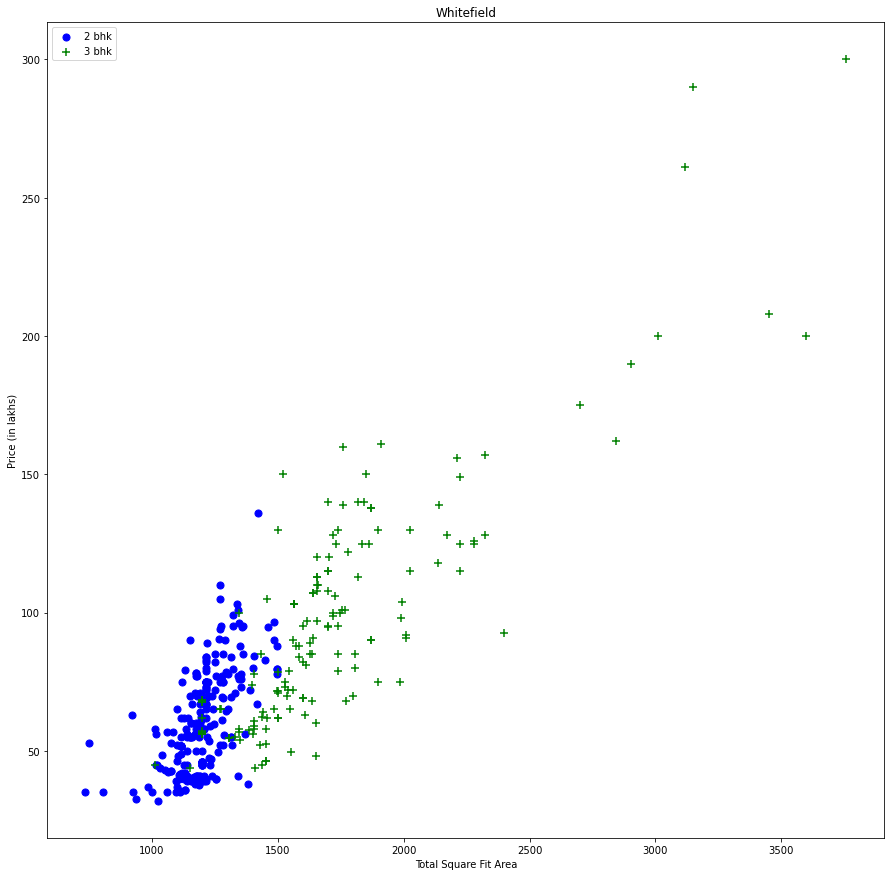

In [35]:
plot("Whitefield", df10, [2,3])

<b> As we can see there are many such samples where we are getting 3bhk price being lower than 2bhk or 2bhk being lower than 1bhk, we need to remove such samples for some areas</b>

In [36]:
df10.shape

(10888, 9)

In [37]:
loc_group = df10.groupby("location")
rm = np.array([])
for city, city_df in loc_group:
    bhk_group = city_df.groupby("bhk")
    bhk_stats = {}
    
    # here we are creating a separate dictionary that contains the mean value of every bhk per city
    for bhk, bhk_df in bhk_group:
        bhk_stats[bhk] = {
            "mean" : bhk_df["price_per_sqft"].mean(),
            "count" : bhk_df["price_per_sqft"].count(),
            "bhk" : bhk,
            "city" : bhk_df["location"]
        }
    
    # now we will compare each price_per_sqft for each bhk of each city with the mean value of the previous bhk,
    # for example we compare each price_per_sqft value of 2bhk with mean value of 1bhk and if it's low then we
    # add all to the numpy array which we use to drop those values
    for bhk, bhk_df in bhk_group:
        if bhk > 1 and bhk_stats[bhk]["count"] > 10:
            try:
                prev_bhk_stats = bhk_stats.get(bhk-1)
                rm = np.append(rm, bhk_df[bhk_df.price_per_sqft<(prev_bhk_stats['mean'])].index)
            except:
                pass
df11 = df10.drop(rm, axis="index")
df11.shape

(7083, 9)

<b> Now we can plot the cities again to see the changes, hopefully wrong data points will be removed </b>

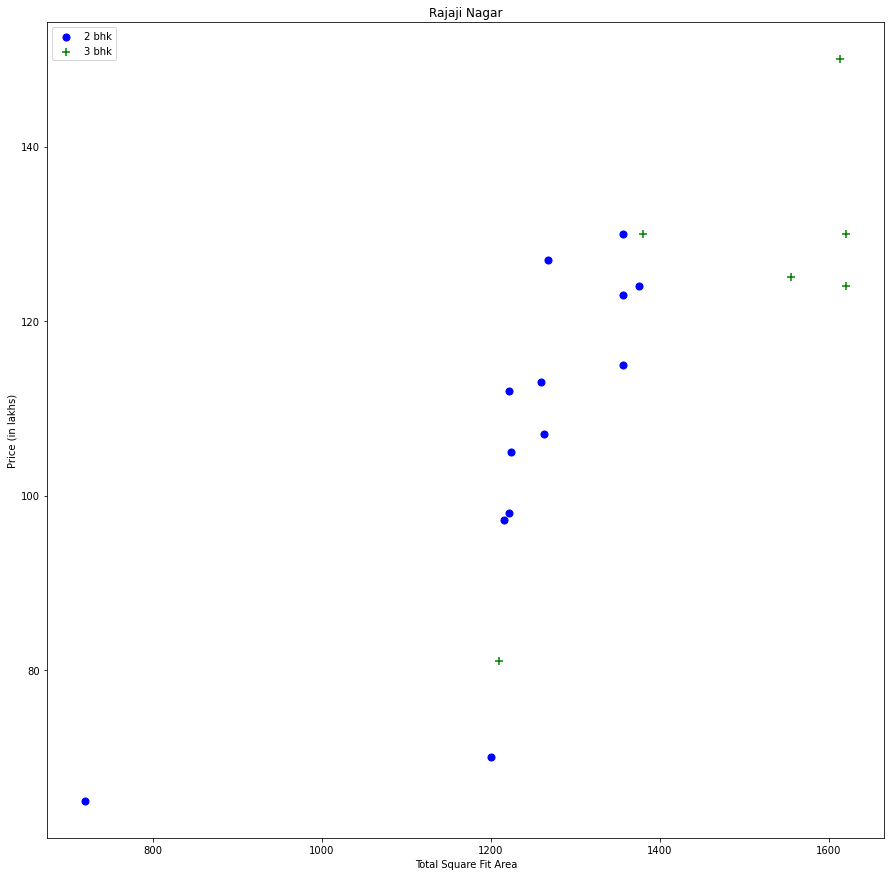

In [38]:
plot("Rajaji Nagar", df11, [2,3])

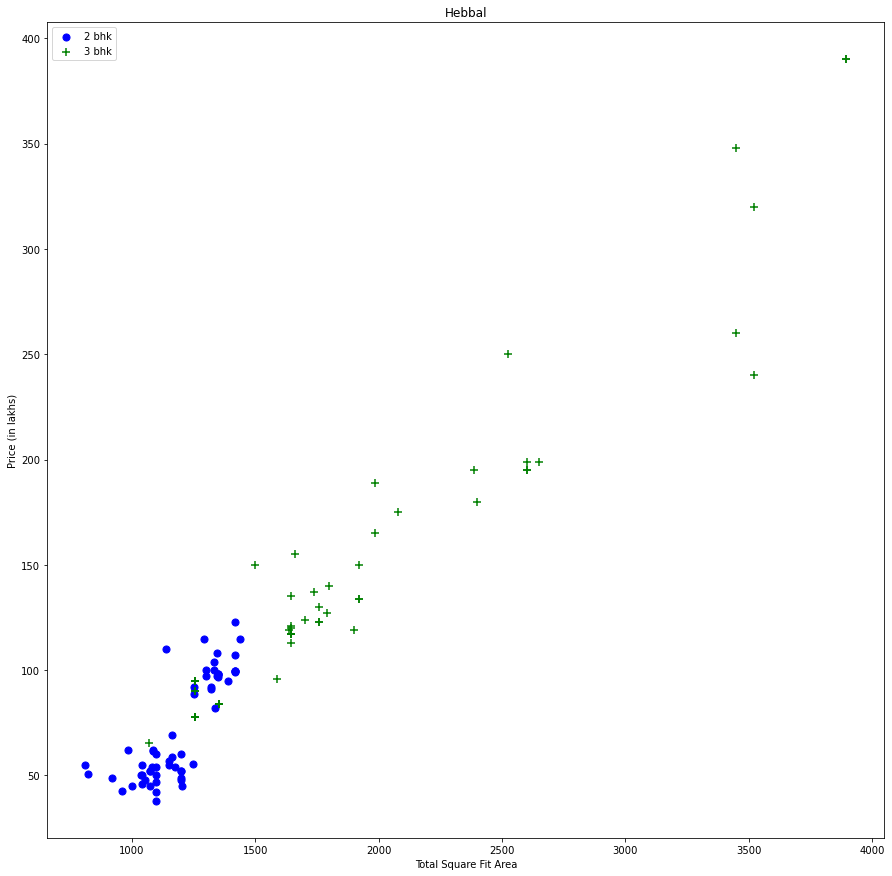

In [39]:
plot("Hebbal", df11, [2,3])

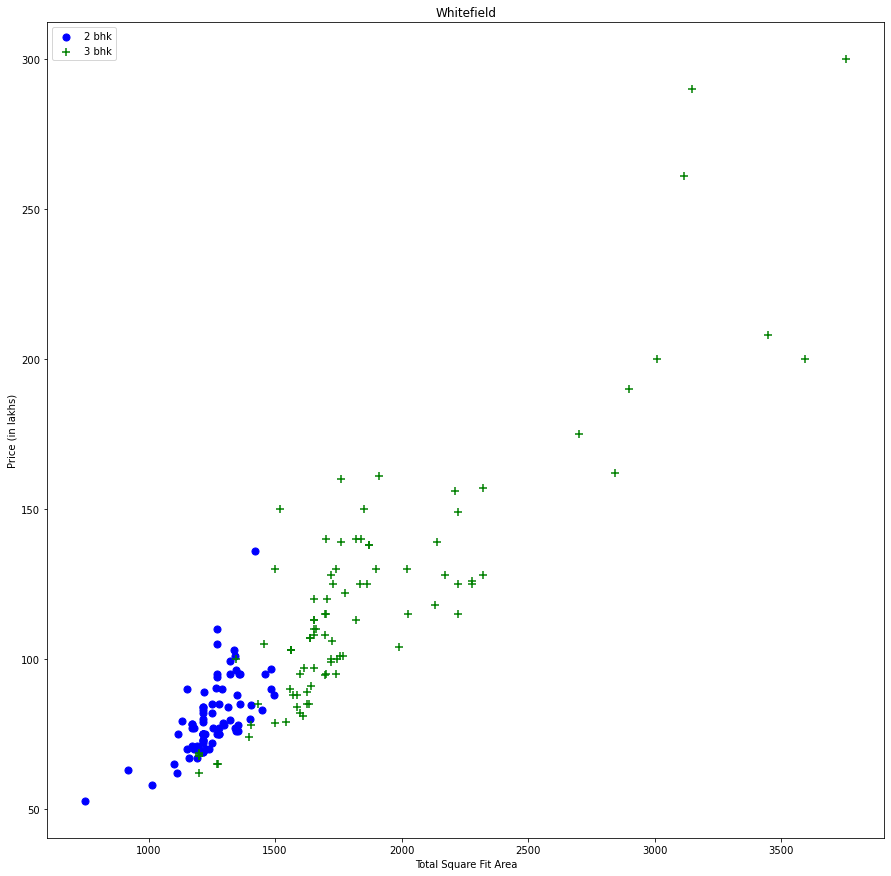

In [40]:
plot("Whitefield", df11, [2,3])

<b> Now we are going to check the bathroom data and see if there are some outliers</b>

In [41]:
df11["bath"].describe()

count    7083.000000
mean        2.496400
std         1.027348
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: bath, dtype: float64

<b> as we can see there are homes that have 13 bathrooms, now normally every bedroom can have 1 attached bathroom and 1 extra for guests so usually there shouldn't be more bathroom than total bhk+1</b>

In [42]:
df12 = df11[df11["bath"] < df11["bhk"]+1]
df12.shape

(6662, 9)

<h1 style="color:grey; font-size:40px">One Hot Encoding for Location</h1>

In [43]:
dummies = pd.get_dummies(df12.location)
dummies.head(3)

,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df13 = pd.concat([df12, dummies], axis=1)
df13.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,zscore,Devarachikkanahalli,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556,-0.471219,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861,0.014696,0,...,0,0,0,0,0,0,0,0,0,0
14,Sarjapur,3 Bedroom,2250.0,3.0,2.0,148.00,3,6577.777778,0.097810,0,...,0,0,0,0,0,0,0,0,0,0
15,Mysore Road,2 BHK,1175.0,2.0,2.0,73.50,2,6255.319149,0.017057,0,...,0,0,0,0,0,0,0,0,0,0
16,Bisuvanahalli,3 BHK,1180.0,3.0,2.0,48.00,3,4067.796610,-0.530761,0,...,0,0,0,0,0,0,0,0,0,0
20,Kengeri,1 BHK,600.0,1.0,1.0,15.00,1,2500.000000,-0.923382,0,...,0,0,0,0,0,0,0,0,0,0
21,Binny Pete,3 BHK,1755.0,3.0,1.0,122.00,3,6951.566952,0.191417,0,...,0,0,0,0,0,0,0,0,0,0
23,Bellandur,3 BHK,1767.0,3.0,1.0,103.00,3,5829.088851,-0.089683,0,...,0,0,0,0,0,0,0,0,0,0
24,other,1 RK,510.0,1.0,0.0,25.25,1,4950.980392,-0.309587,0,...,0,0,0,0,0,0,0,0,0,1
27,Whitefield,3 BHK,1610.0,3.0,2.0,81.00,3,5031.055901,-0.289533,0,...,0,0,0,1,0,0,0,0,0,0


<b>Now finally we are going to drop all unwanted columns</b>

In [45]:
df14 = df13.drop(["location", "price", "size", "balcony", "price_per_sqft", "zscore"], axis="columns")
df14

,total_sqft,bath,bhk,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2250.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1175.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1180.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,1345.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,1715.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,3453.0,4.0,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13317,1141.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1 style="color:grey; font-size=40px">Model Building</h1>

<b>Creating the hypothesis function</b>

In [46]:
def hyp(df, theeta):
    xArray = df.to_numpy()
    return xArray.dot(theeta)

<b>Creating the cost function</b>

In [47]:
def cost(df, theeta, df_y, m):
    yArray = df_y.to_numpy()
    return (np.sum(np.square(hyp(df, theeta) - yArray)))/(0.5*m)

<b>creating the gradient function</b>

In [48]:
def grad(m, theeta, df_y, df):
    y = df_y.to_numpy()
    x = df.to_numpy()
    sub = hyp(df, theeta) - y
    div = sub/m
    mult = div.dot(x)
    return mult

<h1 style="color:Grey; font-size:40px">Feature Scaling using Mean Normalization</h1>
<b>currently our dataset has various types of value ranges, the sqft is in 1000s and the other parameters are roughly from 1-6. Such difference in parameters will skew our model and it will be hard and time consuming to perform gradient descent, so we will try to fit all the parameters into a similar range</b>

In [49]:
df15 = df14.copy()
df15.loc[:,"total_sqft"] = (df15["total_sqft"] - df15["total_sqft"].mean())/(df15["total_sqft"].std())
df15.loc[:,"bath"] = (df15["bath"] - df15["bath"].mean())/(df15["bath"].std())
df15.loc[:,"bhk"] = (df15["bhk"] - df15["bhk"].mean())/(df15["bhk"].std())
df15.describe()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
count,6.662000e+03,6.662000e+03,6.662000e+03,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,...,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000
mean,6.325705e-16,7.294609e-16,2.543081e-17,0.001951,0.001801,0.001651,0.000300,0.004203,0.001801,0.011258,...,0.000901,0.001051,0.006304,0.033473,0.002252,0.015011,0.003753,0.001801,0.006605,0.151606
std,1.000000e+00,1.000000e+00,1.000000e+00,0.044134,0.042406,0.040604,0.017325,0.064699,0.042406,0.105512,...,0.029999,0.032400,0.079156,0.179883,0.047401,0.121604,0.061148,0.042406,0.081006,0.358666
min,-1.590217e+00,-1.562777e+00,-1.643762e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.898746e-01,-4.240675e-01,-5.691062e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.285433e-01,-4.240675e-01,-5.691062e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.666108e-01,7.146418e-01,5.055495e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.725315e+01,1.210173e+01,1.125211e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>Adding an extra column that contains only 1 so that we can compute the bias in one calculation instead of doing a separate gradient function for that</b>

In [50]:
df15["x0"] = np.full(df15.count()[0], 1)
df15

,total_sqft,bath,bhk,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,x0
2,-0.022229,-0.424068,0.505550,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.089181,0.714642,0.505550,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,1.091868,0.714642,0.505550,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15,-0.386718,-0.424068,-0.569106,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,-0.379840,0.714642,0.505550,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,-0.152895,-0.424068,0.505550,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13314,0.356014,0.714642,0.505550,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13315,2.746508,1.853351,2.654861,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
13317,-0.433482,-0.424068,-0.569106,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<h1 style="color:Grey; font-size:40px">Gradient Descent</h1>

In [51]:
# required variables
m = df15["total_sqft"].count() #total samples
theeta = np.full(df15.shape[1], 1) #values of theeta
prev_theeta = theeta
df_y = (df13["price"]-df13["price"].mean())/(df13["price"].max()-df13["price"].min())
alpha = 0.01
# training the model
class GD:
    def __init__(self):
        self.i = 0
        self.cost_array = np.array([])
    
    def gd(self, theeta, prev_theeta, alpha, m, df_y, df):
        prev_cost = 100
        while True:
            theeta = prev_theeta - (alpha*grad(m, theeta, df_y, df))
            prev_theeta = theeta
            c = cost(df, theeta, df_y, m)
            self.cost_array = np.append(self.cost_array, c)
            if prev_cost - c < 20**-4:
                return theeta 
                break
            prev_cost = c
            self.i = self.i+1

# run the model
gradient_descent = GD()
parms = gradient_descent.gd(theeta, prev_theeta, alpha, m, df_y, df15)
print("cost_array - {}".format(gradient_descent.cost_array))
print("Total iterations - {}".format(gradient_descent.i))

cost_array - [2.19105446e+01 2.10382550e+01 2.02052347e+01 ... 4.57067345e-03
 4.56440979e-03 4.55816125e-03]
Total iterations - 1014


<b>Now that the training is done and we are getting good results we will see how the cost is reducing per iteration using a graph</b>

<function matplotlib.pyplot.show(close=None, block=None)>

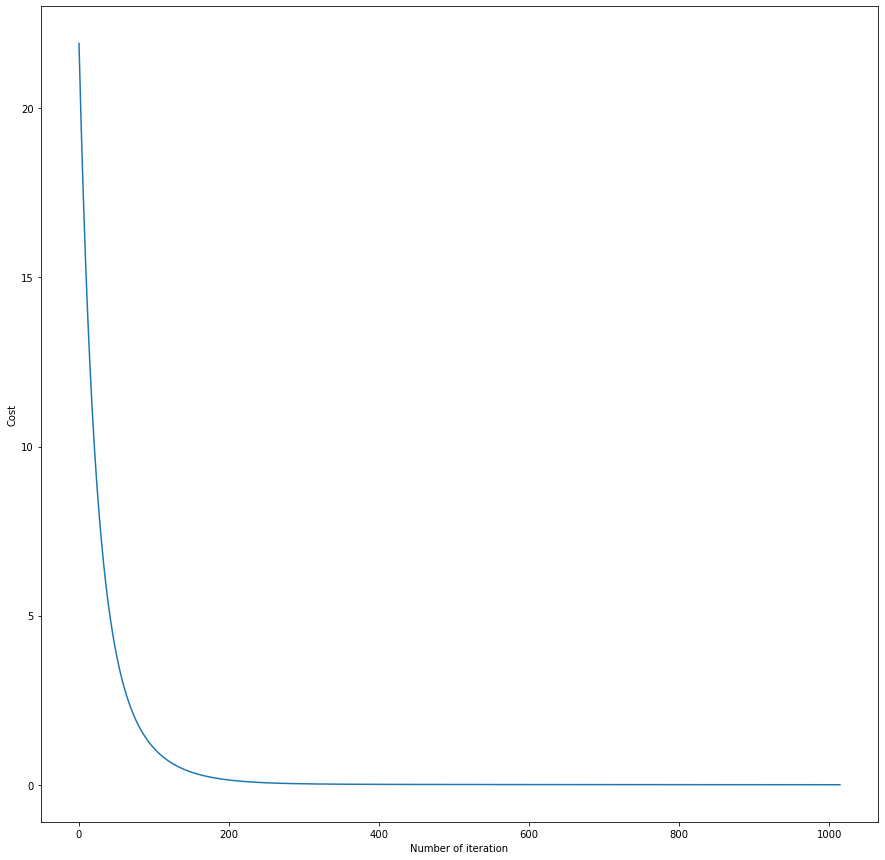

In [52]:
yAxis = gradient_descent.cost_array
xAxis = range(gradient_descent.i+1)
plt.plot(xAxis, yAxis)
plt.xlabel("Number of iteration")
plt.ylabel("Cost")
plt.show

<h1 style="color:grey; font-size=40px">Prediction</h1>
<b>time to make some prediction based on our trained model</b>

In [58]:
def predict(location, total_sqft, bath, bhk):
    loc_index = np.where(df15.columns == location)[0][0]
    x = np.zeros(len(df15.columns))
    x[0] = (total_sqft - df14["total_sqft"].mean())/(df14["total_sqft"].std())
    x[1] = (bath - df14["bath"].mean())/(df14["bath"].std())
    x[2] = (bhk - df14["bhk"].mean())/(df14["bhk"].std())
    x[df15.shape[1]-1] = 1
    if loc_index > 0:
        x[loc_index] = 1
    
    # price = parms[0]*x[0] + parms[1]*x[1] + parms[2]*x[2] + parms[loc_index]*x[loc_index] + parms[-1]
    price = x.dot(parms)
    return price*(df13["price"].std()) + df13["price"].mean()
    # return price

In [59]:
print(predict('Indira Nagar',1000, 2, 2))

87.39959756488184


In [62]:
print(predict('Chikka Tirupathi',2600, 5, 4))

94.23764097086548
